In [79]:
from google.colab import drive #import drive from google.colab
drive.mount('/content/drive') #mount google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
pip install geopandas matplotlib


In [81]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas as gpd
from sklearn.cluster import KMeans

In [82]:
forecast_df = pd.read_excel('/content/drive/MyDrive/final_project/EML_forecast/forecast_data.xlsx')

In [83]:
no2_emission_df = pd.read_csv('/content/drive/MyDrive/final_project/EML_forecast/nitrous-oxide-emissions.csv')

In [84]:
#Dropping unnamed column from  dataframe
forecast_df = forecast_df.drop(columns=['Unnamed: 0'], axis=1)
print(forecast_df)

      Year      Country   Emission  Fertlizer_consumption  Temperature
0     1961  Afghanistan  2917273.5                   0.13    11.336061
1     1962  Afghanistan  2891160.8                   0.13    11.144664
2     1963  Afghanistan  2941533.2                   0.13    12.411098
3     1964  Afghanistan  3004207.0                   0.13    10.428792
4     1965  Afghanistan  3075739.0                   0.13    11.212704
...    ...          ...        ...                    ...          ...
7864  2017     Zimbabwe  5147235.0                  15.85    21.228878
7865  2018     Zimbabwe  5237749.0                  12.22    21.909628
7866  2019     Zimbabwe  5149571.5                  12.22    22.434425
7867  2020     Zimbabwe  4687377.5                   9.59    21.785597
7868  2021     Zimbabwe  4966384.0                   9.59    21.573135

[7869 rows x 5 columns]


In [85]:
#Converting Year column to date format
forecast_df['Year'] = pd.to_datetime(forecast_df['Year'], format='%Y')
print(forecast_df)

           Year      Country   Emission  Fertlizer_consumption  Temperature
0    1961-01-01  Afghanistan  2917273.5                   0.13    11.336061
1    1962-01-01  Afghanistan  2891160.8                   0.13    11.144664
2    1963-01-01  Afghanistan  2941533.2                   0.13    12.411098
3    1964-01-01  Afghanistan  3004207.0                   0.13    10.428792
4    1965-01-01  Afghanistan  3075739.0                   0.13    11.212704
...         ...          ...        ...                    ...          ...
7864 2017-01-01     Zimbabwe  5147235.0                  15.85    21.228878
7865 2018-01-01     Zimbabwe  5237749.0                  12.22    21.909628
7866 2019-01-01     Zimbabwe  5149571.5                  12.22    22.434425
7867 2020-01-01     Zimbabwe  4687377.5                   9.59    21.785597
7868 2021-01-01     Zimbabwe  4966384.0                   9.59    21.573135

[7869 rows x 5 columns]


In [86]:
#Removing all the entries where the Country name is World
forecast_df = forecast_df[forecast_df['Country']!='World']

In [87]:
#Creating a new dataframe group by Year and taking the average of NO2 emission,
#Fertilizer counsumption and Temerature
corr_df = forecast_df.groupby('Year')[['Emission', 'Fertlizer_consumption',
                                          'Temperature']].mean()
print(corr_df)

                Emission  Fertlizer_consumption  Temperature
Year                                                        
1961-01-01  8.489050e+06              14.736211    19.195658
1962-01-01  8.757632e+06              15.680742    19.009852
1963-01-01  9.042756e+06              16.729219    19.045872
1964-01-01  9.387130e+06              17.431719    18.986813
1965-01-01  9.769996e+06              18.166797    18.890422
...                  ...                    ...          ...
2017-01-01  1.840855e+07              52.722031    20.343383
2018-01-01  1.829722e+07              51.806641    20.358923
2019-01-01  1.802809e+07              50.519258    20.509540
2020-01-01  1.808556e+07              53.520234    20.517973
2021-01-01  1.833325e+07              51.773203    20.404902

[61 rows x 3 columns]


In [88]:
#Resetting the index to transfrom Year as column
corr_df = corr_df.reset_index()
#Dropping the Year column for normalizing the data
corr_df_filter = corr_df.drop(columns = ['Year'], axis=1)

In [89]:
#Normalising data using MinMaxScaler and creating a new normalised datafraame
scaler = StandardScaler()
corr_df_norm = pd.DataFrame(scaler.fit_transform(corr_df_filter), columns = corr_df_filter.columns)
print(corr_df_norm)

    Emission  Fertlizer_consumption  Temperature
0  -2.134234              -2.360820    -0.838553
1  -2.041978              -2.277801    -1.227900
2  -1.944039              -2.185647    -1.152421
3  -1.825748              -2.123901    -1.276177
4  -1.694236              -2.059293    -1.478160
..       ...                    ...          ...
56  1.273065               0.977896     1.566445
57  1.234821               0.897439     1.599009
58  1.142378               0.784286     1.914618
59  1.162120               1.048053     1.932289
60  1.247199               0.894500     1.695355

[61 rows x 3 columns]


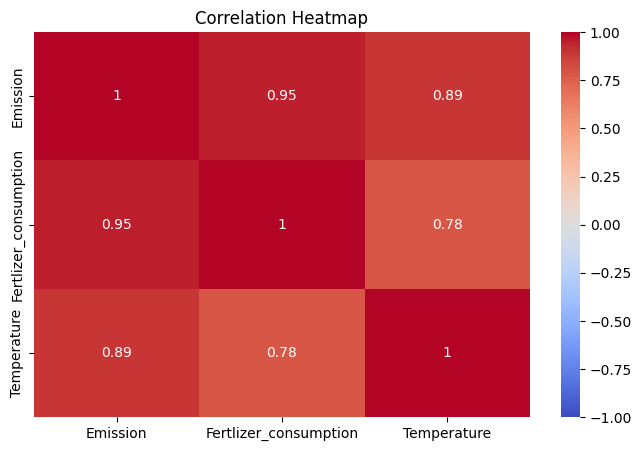

In [90]:
#Creating a correlation heatmap to explain the correlation between variables
corr_matrix = corr_df_norm.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

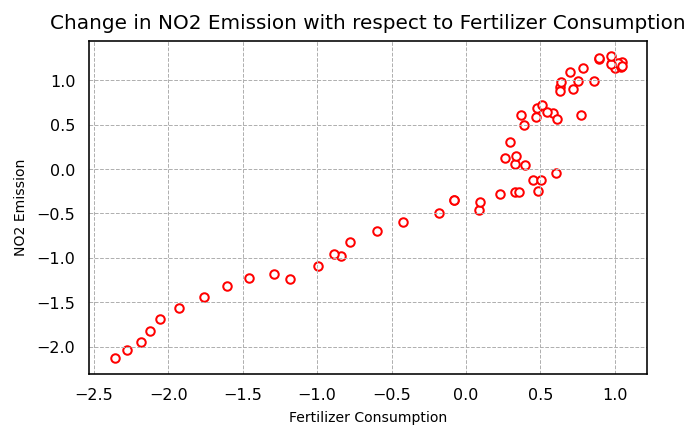

In [91]:
#Creating a scatter plot to show the correlation between Nitrous oxide emission
#and Fertilizer consumption
plt.figure(dpi=144 ,figsize=(5,3))
plt.scatter(x=corr_df_norm['Fertlizer_consumption'], y=corr_df_norm['Emission'],
            s=18, facecolor='white', edgecolor='red')
plt.xlabel("Fertilizer Consumption", fontsize=7)
plt.ylabel("NO2 Emission", fontsize=7)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(linewidth=0.5, linestyle='--')
ax = plt.gca()
ax.tick_params(left=False, bottom=False)
plt.title("Change in NO2 Emission with respect to Fertilizer Consumption", fontsize=10)
plt.show()

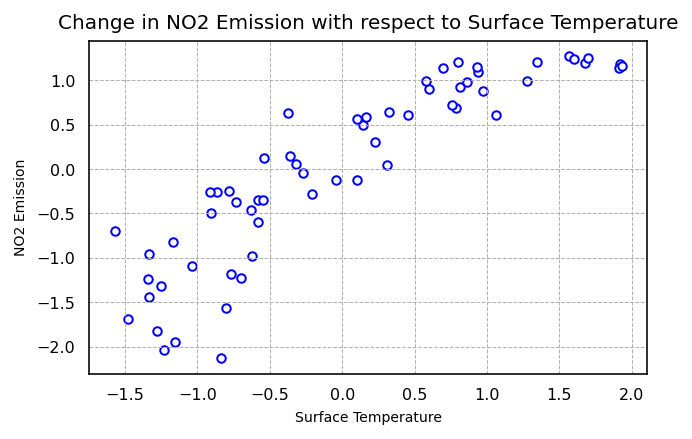

In [92]:
#Plotting a scatter plot to show the correlation between Nitrous Oxide emission
#and temperature
plt.figure(dpi=144, figsize=(5,3))
plt.scatter(x=corr_df_norm['Temperature'], y=corr_df_norm['Emission'],
            s=18, facecolor='white', edgecolor='blue')
plt.xlabel("Surface Temperature", fontsize=7)
plt.ylabel("NO2 Emission", fontsize=7)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(linewidth=0.5, linestyle='--')
ax = plt.gca()
ax.tick_params(left=False, bottom=False)
plt.title("Change in NO2 Emission with respect to Surface Temperature", fontsize=10)
plt.show()

In [93]:
#Creating a dataframe group by country and taking the average of Nitrous oxide
#emission, fertilizer consumption and temperature over the years
cluster_df = forecast_df.groupby('Country')[['Emission', 'Fertlizer_consumption', 'Temperature']].mean()
cluster_df = cluster_df.reset_index()
print(cluster_df)

         Country      Emission  Fertlizer_consumption  Temperature
0    Afghanistan  3.396077e+06               3.701311    12.139568
1        Albania  1.058664e+06              50.029344    12.347506
2        Algeria  4.612337e+06               6.541475    23.190772
3         Angola  1.213562e+07               2.046066    21.869676
4      Argentina  3.596698e+07              11.289098    14.537532
..           ...           ...                    ...          ...
123    Venezuela  9.408217e+06              41.347377    25.164835
124      Vietnam  1.057226e+07              78.833279    23.589646
125        Yemen  2.686446e+06               6.472459    25.158911
126       Zambia  9.356317e+06              17.315574    21.715711
127     Zimbabwe  4.793365e+06              20.674590    21.209186

[128 rows x 4 columns]


In [94]:
#Normalising the values of Cluster_df using standard scaler
scaler = StandardScaler()
cluster_df[['Emission', 'Fertlizer_consumption', 'Temperature']] = scaler.fit_transform(cluster_df[['Emission', 'Fertlizer_consumption', 'Temperature']])
print(cluster_df)

         Country  Emission  Fertlizer_consumption  Temperature
0    Afghanistan -0.298807              -0.871955    -1.000965
1        Albania -0.360581               0.194047    -0.973051
2        Algeria -0.266663              -0.806603     0.482601
3         Angola -0.067834              -0.910042     0.305251
4      Argentina  0.561991              -0.697361    -0.679051
..           ...       ...                    ...          ...
123    Venezuela -0.139915              -0.005724     0.747609
124      Vietnam -0.109151               0.856822     0.536148
125        Yemen -0.317561              -0.808192     0.746814
126       Zambia -0.141287              -0.558693     0.284582
127     Zimbabwe -0.261879              -0.481402     0.216584

[128 rows x 4 columns]


In [95]:
#Creating a new dataframe with only the normalised values for clustering
norm_cluster_df = cluster_df[['Emission', 'Fertlizer_consumption', 'Temperature']]

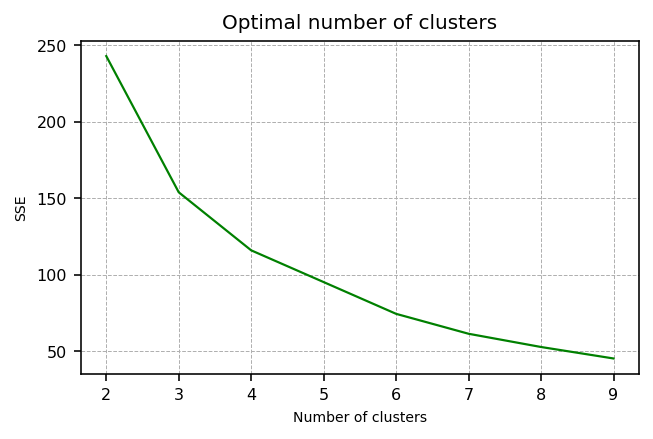

In [96]:
#Calculating the optimal number of clusters using elbow method
sse = []
for i in range(2,10):
  model = KMeans(n_clusters=i, random_state=42, n_init=10)
  model.fit(norm_cluster_df)
  sse.append(model.inertia_)

plt.figure(dpi=144, figsize=(5,3))
plt.plot(range(2,10), sse, linewidth=1.1, c="green")
plt.xlabel("Number of clusters", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.ylabel("SSE", fontsize=7)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Optimal number of clusters", fontsize=10)
plt.show()

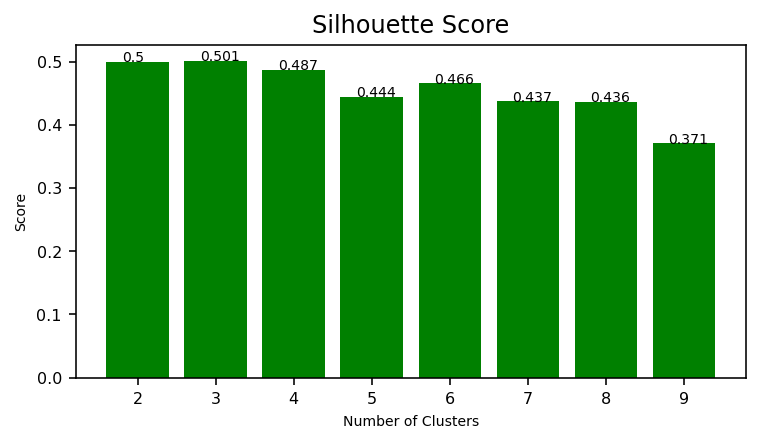

In [97]:
#Calcualating Silhouette score to find the optimal number of clusters
def add_label(x, y):
  # A function to add labels inside a plot
  for i in range (len(x)):
    plt.text(i+1.8, y[i], round(y[i], 3), fontsize=7)
s_score = []
for i in range(2,10):
  model = KMeans(n_clusters=i,n_init=42, random_state=42)
  labels = model.fit_predict(norm_cluster_df)
  s_avg = silhouette_score(norm_cluster_df, labels)
  s_score.append(s_avg)
plt.figure(dpi=144, figsize=(6,3))
plt.bar(range(2,10), s_score, color='green')
add_label(range(2,10), s_score)
plt.xlabel("Number of Clusters", fontsize=7)
plt.ylabel("Score", fontsize=7)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Silhouette Score")
plt.show()


In [98]:
#Applying KMeans clustering algorithm with number of clusters equal to 3
model = KMeans(n_clusters=3, n_init=42, random_state=42)
labels = model.fit_predict(norm_cluster_df)

# Create a dataframe with cluster labels
country_labels = pd.DataFrame({'Country': cluster_df['Country'], 'Cluster': labels})

In [99]:
#Merging the actual forecast_df with country_labels by Country column
cluster_forecast_df = pd.merge(forecast_df, country_labels, on=('Country'))
print(cluster_forecast_df)

           Year      Country   Emission  Fertlizer_consumption  Temperature  \
0    1961-01-01  Afghanistan  2917273.5                   0.13    11.336061   
1    1962-01-01  Afghanistan  2891160.8                   0.13    11.144664   
2    1963-01-01  Afghanistan  2941533.2                   0.13    12.411098   
3    1964-01-01  Afghanistan  3004207.0                   0.13    10.428792   
4    1965-01-01  Afghanistan  3075739.0                   0.13    11.212704   
...         ...          ...        ...                    ...          ...   
7803 2017-01-01     Zimbabwe  5147235.0                  15.85    21.228878   
7804 2018-01-01     Zimbabwe  5237749.0                  12.22    21.909628   
7805 2019-01-01     Zimbabwe  5149571.5                  12.22    22.434425   
7806 2020-01-01     Zimbabwe  4687377.5                   9.59    21.785597   
7807 2021-01-01     Zimbabwe  4966384.0                   9.59    21.573135   

      Cluster  
0           0  
1           0  
2  

In [100]:
#Ctreating the new dataframe with the newly clustered daatframe by Country and Cluster
cluster_grouped_df = cluster_forecast_df.groupby(['Country', 'Cluster'])[['Emission', 'Fertlizer_consumption', 'Temperature']].mean()
cluster_grouped_df = cluster_grouped_df.reset_index()


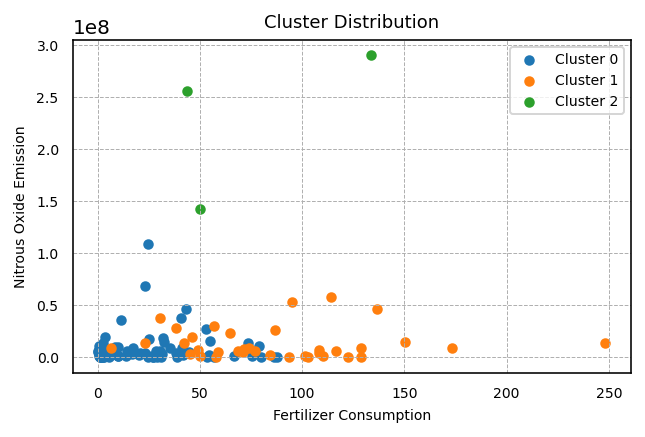

In [101]:
#Plotting the scatter plot to show the cluster distribution
plt.figure(dpi=144, figsize=(5,3))
plt.scatter(x=cluster_grouped_df[cluster_grouped_df["Cluster"]==0]['Fertlizer_consumption'],
            y=cluster_grouped_df[cluster_grouped_df["Cluster"]==0]['Emission'],
            label="Cluster 0", s=18)
plt.scatter(x=cluster_grouped_df[cluster_grouped_df["Cluster"]==1]['Fertlizer_consumption'],
            y=cluster_grouped_df[cluster_grouped_df["Cluster"]==1]['Emission'],
            label="Cluster 1", s=18)
plt.scatter(x=cluster_grouped_df[cluster_grouped_df["Cluster"]==2]['Fertlizer_consumption'],
            y=cluster_grouped_df[cluster_grouped_df["Cluster"]==2]['Emission'],
            label="Cluster 2", s=18)
plt.legend(fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
ax = plt.gca()
ax.tick_params(left=False, bottom=False)
plt.xlabel("Fertilizer Consumption", fontsize=7)
plt.ylabel("Nitrous Oxide Emission", fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Cluster Distribution", fontsize=9)
plt.show()

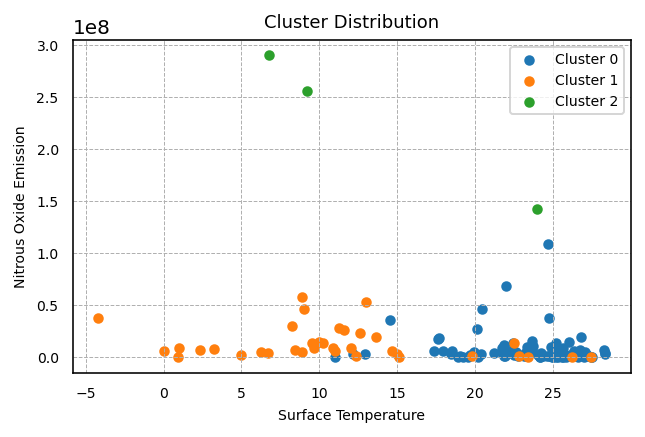

In [102]:
#Plotting the scatter plot to show the cluster distribution
plt.figure(dpi=144, figsize=(5,3))
plt.scatter(x=cluster_grouped_df[cluster_grouped_df["Cluster"]==0]['Temperature'],
            y=cluster_grouped_df[cluster_grouped_df["Cluster"]==0]['Emission'],
            label="Cluster 0", s=18)
plt.scatter(x=cluster_grouped_df[cluster_grouped_df["Cluster"]==1]['Temperature'],
            y=cluster_grouped_df[cluster_grouped_df["Cluster"]==1]['Emission'],
            label="Cluster 1", s=18)
plt.scatter(x=cluster_grouped_df[cluster_grouped_df["Cluster"]==2]['Temperature'],
            y=cluster_grouped_df[cluster_grouped_df["Cluster"]==2]['Emission'],
            label="Cluster 2", s=18)
plt.legend(fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
ax = plt.gca()
ax.tick_params(left=False, bottom=False)
plt.xlabel("Surface Temperature", fontsize=7)
plt.ylabel("Nitrous Oxide Emission", fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Cluster Distribution", fontsize=9)
plt.show()

In [103]:
cluster_grouped_df = cluster_grouped_df.reset_index()

In [104]:
#Creating seperate dataframe for each of the clusters
cluster0_df = cluster_forecast_df[cluster_forecast_df['Cluster']==0]
cluster1_df = cluster_forecast_df[cluster_forecast_df['Cluster']==1]
cluster2_df = cluster_forecast_df[cluster_forecast_df['Cluster']==2]

In [105]:
#Grouping each of the cluster dataframe by Year
cluster0_grouped_df = cluster0_df.groupby(['Year'])[['Emission', 'Fertlizer_consumption', 'Temperature']].mean()
cluster1_grouped_df = cluster1_df.groupby(['Year'])[['Emission', 'Fertlizer_consumption', 'Temperature']].mean()
cluster2_grouped_df = cluster2_df.groupby(['Year'])[['Emission', 'Fertlizer_consumption', 'Temperature']].mean()


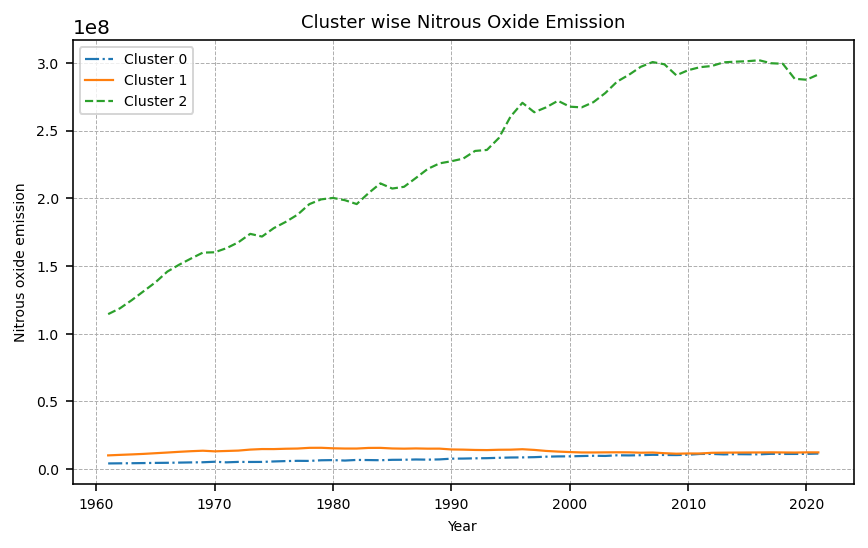

In [106]:
#Creating a line plot to show the trend in nitrous oxide Emission for each cluster
#over the years
plt.figure(dpi=144, figsize=(7,4))
plt.plot(cluster0_grouped_df.index, cluster0_grouped_df['Emission'],
         label='Cluster 0', linewidth = 1.1, linestyle='-.')
plt.plot(cluster1_grouped_df.index, cluster1_grouped_df['Emission'],
         label='Cluster 1', linewidth = 1.1, linestyle='-')
plt.plot(cluster2_grouped_df.index, cluster2_grouped_df['Emission'],
         label='Cluster 2', linewidth = 1.1, linestyle='--')
plt.xlabel("Year", fontsize=7)
plt.ylabel("Nitrous oxide emission", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(fontsize=7)
plt.title("Cluster wise Nitrous Oxide Emission", fontsize=9)
plt.show()

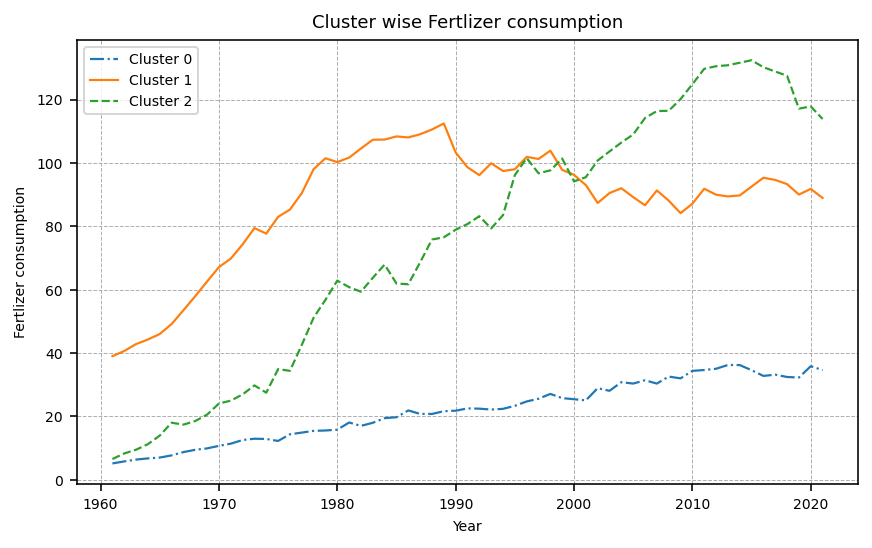

In [107]:
#Creating a lineplot to show the trend in Fertilizer Consumption for each cluster
#over the years
plt.figure(dpi=144, figsize=(7,4))
plt.plot(cluster0_grouped_df.index, cluster0_grouped_df['Fertlizer_consumption'],
         label='Cluster 0', linewidth = 1.1, linestyle='-.')
plt.plot(cluster1_grouped_df.index, cluster1_grouped_df['Fertlizer_consumption'],
         label='Cluster 1', linewidth = 1.1, linestyle='-')
plt.plot(cluster2_grouped_df.index, cluster2_grouped_df['Fertlizer_consumption'],
         label='Cluster 2', linewidth = 1.1, linestyle='--')
plt.xlabel("Year", fontsize=7)
plt.ylabel("Fertlizer consumption", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(fontsize=7)
plt.title("Cluster wise Fertlizer consumption", fontsize=9)
plt.show()

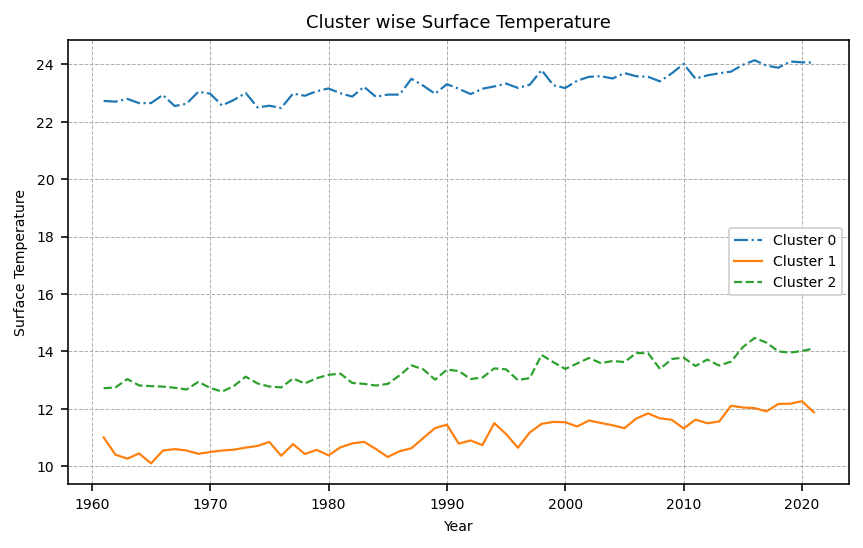

In [108]:
#Creating a line plot to show the trend in surface temperature for each cluster
#over the years
plt.figure(dpi=144, figsize=(7,4))
plt.plot(cluster0_grouped_df.index, cluster0_grouped_df['Temperature'],
         label='Cluster 0', linewidth = 1.1, linestyle='-.')
plt.plot(cluster1_grouped_df.index, cluster1_grouped_df['Temperature'],
         label='Cluster 1', linewidth = 1.1, linestyle='-')
plt.plot(cluster2_grouped_df.index, cluster2_grouped_df['Temperature'],
         label='Cluster 2', linewidth = 1.1, linestyle='--')
plt.xlabel("Year", fontsize=7)
plt.ylabel("Surface Temperature", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.legend(fontsize=7)
plt.title("Cluster wise Surface Temperature", fontsize=9)
plt.show()

In [109]:
print(country_labels[country_labels['Country'] == "United States"])

           Country  Cluster
121  United States        2


In [110]:
country_labels['Country'] = country_labels['Country'].replace("United States", "United States of America")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.set_index('name').join(country_labels.set_index('Country'))


<ipython-input-110-dc22906f1cf9>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


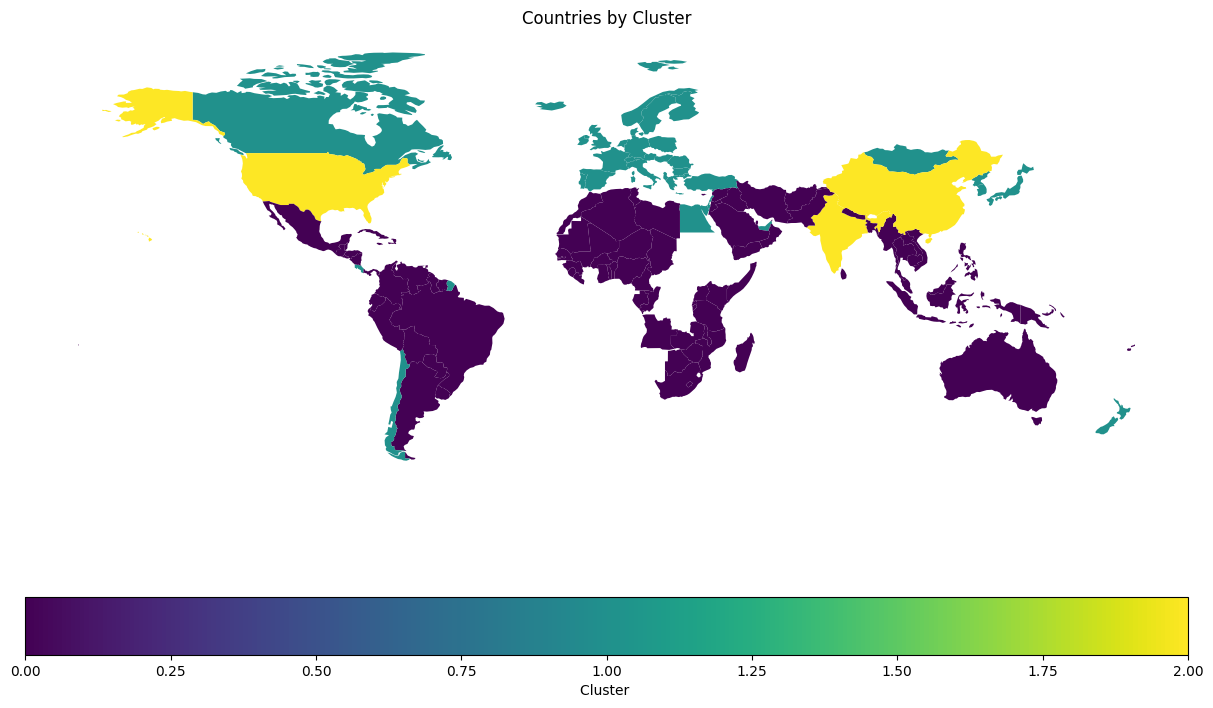

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Cluster', ax=ax, legend=True, legend_kwds={'label': "Cluster ", 'orientation': "horizontal"})
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
plt.title('Countries by Cluster')
plt.show()

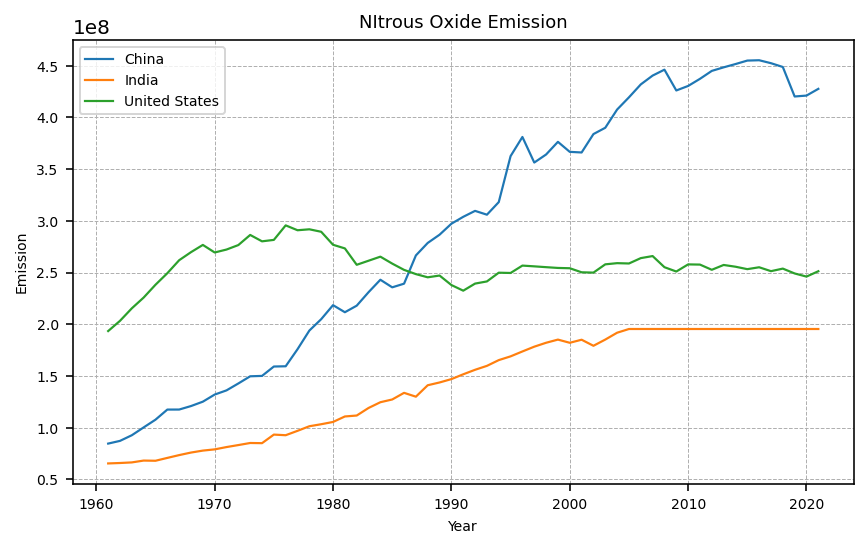

In [112]:
plt.figure(dpi=144,figsize=(7,4))
for country in cluster2_df['Country'].unique():
  cluster_country = cluster2_df[cluster2_df['Country']==country]
  plt.plot(cluster_country["Year"], cluster_country['Emission'], label=country,
           linewidth = 1.1)
  plt.legend(fontsize=7)
plt.xlabel("Year", fontsize=7)
plt.ylabel("Emission", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("NItrous Oxide Emission", fontsize=9)
plt.show()

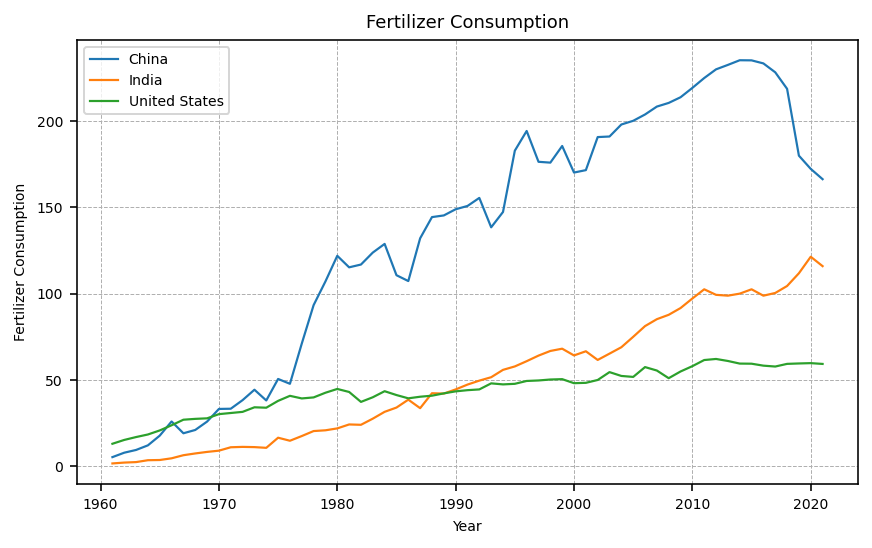

In [128]:
plt.figure(dpi=144,figsize=(7,4))
for country in cluster2_df['Country'].unique():
  cluster_country = cluster2_df[cluster2_df['Country']==country]
  plt.plot(cluster_country["Year"], cluster_country['Fertlizer_consumption'], label=country,
           linewidth = 1.1)
  plt.legend(fontsize=7)
plt.xlabel("Year", fontsize=7)
plt.ylabel("Fertilizer Consumption", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Fertilizer Consumption", fontsize=9)
plt.show()

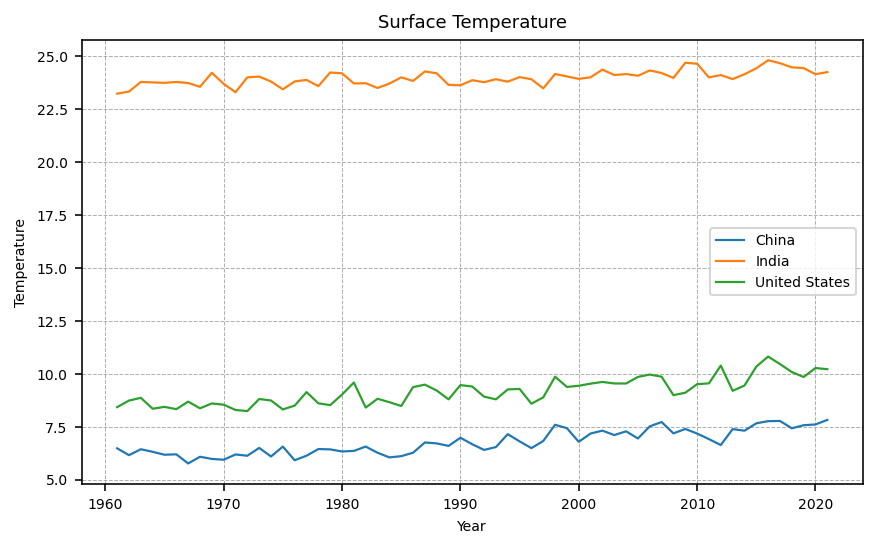

In [129]:
plt.figure(dpi=144,figsize=(7,4))
for country in cluster2_df['Country'].unique():
  cluster_country = cluster2_df[cluster2_df['Country']==country]
  plt.plot(cluster_country["Year"], cluster_country['Temperature'], label=country,
           linewidth = 1.1)
  plt.legend(fontsize=7)
plt.xlabel("Year", fontsize=7)
plt.ylabel("Temperature", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Surface Temperature", fontsize=9)
plt.show()

In [115]:
no2_emission_india = no2_emission_df[(no2_emission_df['Entity']=="India")&(no2_emission_df["Year"]>1960)]
no2_emission_india['Year'] = pd.to_datetime(no2_emission_india['Year'], format = '%Y')


      Entity Code       Year  \
15854  India  IND 1961-01-01   
15855  India  IND 1962-01-01   
15856  India  IND 1963-01-01   
15857  India  IND 1964-01-01   
15858  India  IND 1965-01-01   
...      ...  ...        ...   
15911  India  IND 2018-01-01   
15912  India  IND 2019-01-01   
15913  India  IND 2020-01-01   
15914  India  IND 2021-01-01   
15915  India  IND 2022-01-01   

       Annual nitrous oxide emissions in CO₂ equivalents  
15854                                         65422452.0  
15855                                         65844580.0  
15856                                         66416316.0  
15857                                         68195370.0  
15858                                         68015050.0  
...                                                  ...  
15911                                        264595860.0  
15912                                        273386700.0  
15913                                        282304830.0  
15914                    

<ipython-input-115-182fc7aeffe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no2_emission_india['Year'] = pd.to_datetime(no2_emission_india['Year'], format = '%Y')


In [116]:
no2_emission_india = no2_emission_india.drop(columns = ['Code'], axis=1)
no2_emission_india = no2_emission_india.rename(columns={"Entity" : "Country"})

In [118]:
cluster2_df = pd.merge(cluster2_df, no2_emission_india, on = ['Country', 'Year'],
                     how="left")
cluster2_df['Emission'] = cluster2_df['Annual nitrous oxide emissions in CO₂ equivalents'].combine_first(cluster2_df['Emission'])
cluster2_df = cluster2_df.drop(columns=['Annual nitrous oxide emissions in CO₂ equivalents'], axis=1)
print(cluster2_df)

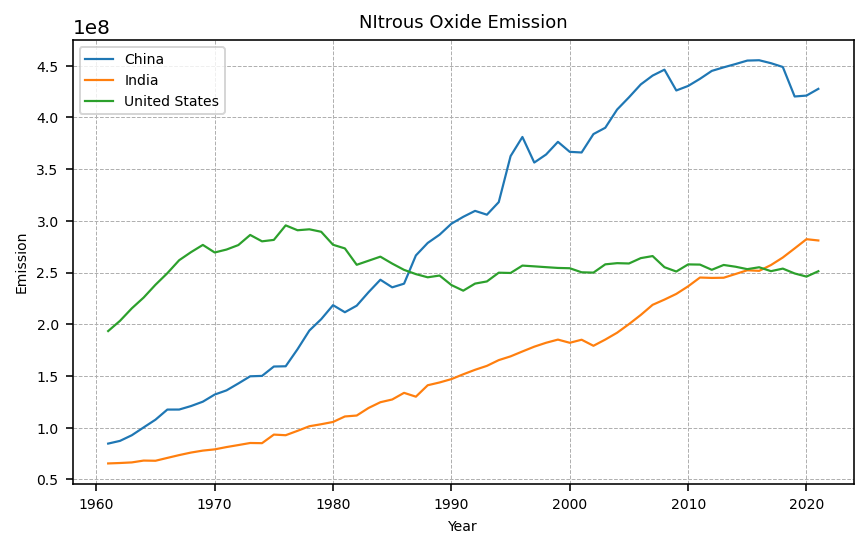

In [123]:
plt.figure(dpi=144,figsize=(7,4))
for country in cluster2_df['Country'].unique():
  cluster_country = cluster2_df[cluster2_df['Country']==country]
  plt.plot(cluster_country["Year"], cluster_country['Emission'], label=country,
           linewidth = 1.1)
  plt.legend(fontsize=7)
plt.xlabel("Year", fontsize=7)
plt.ylabel("Emission", fontsize=7)
plt.grid(linewidth=0.5, linestyle='--')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("NItrous Oxide Emission", fontsize=9)
plt.show()